In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d

In [9]:
def GeneratePathsHWEuler (NoOfPaths, NoOfSteps, T, P0T, lambd, eta):
    dt_fd = 1e-4
    f0T = lambda t: -(np.log(P0T(t + dt_fd)) - np.log(P0T(t - dt_fd))) / (2* dt_fd)  #modèle du forward rate
    r0 = f0T(1e-5)  #f0T pour T=10^-5
    theta = lambda t: ((f0T(t + dt_fd) - f0T(t - dt_fd)) / (2*dt_fd) / lambd + f0T(t)
    + eta**2 / (2* lambd**2) * (1- np.exp(-2*lambd *t)))  #HW drift 
# simulation
    dt = T / NoOfSteps
    Z = np.random.normal(0.0, 1.0, [NoOfPaths, NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps + 1])
    R = np.zeros([NoOfPaths, NoOfSteps + 1])
    time = np.zeros(NoOfSteps + 1)
    R[:, 0] = r0
    for i in range(NoOfSteps):
        if NoOfPaths > 1:
            Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])

        W[:, i + 1] = W[:, i] + np.sqrt(dt) * Z[:, i]
        R[:, i + 1] = (
            R[:, i]
            + lambd * (theta(time[i]) - R[:, i]) * dt
            + eta * (W[:, i + 1] - W[:, i])
        )
        time[i + 1] = time[i] + dt

    return {"time": time, "R": R}

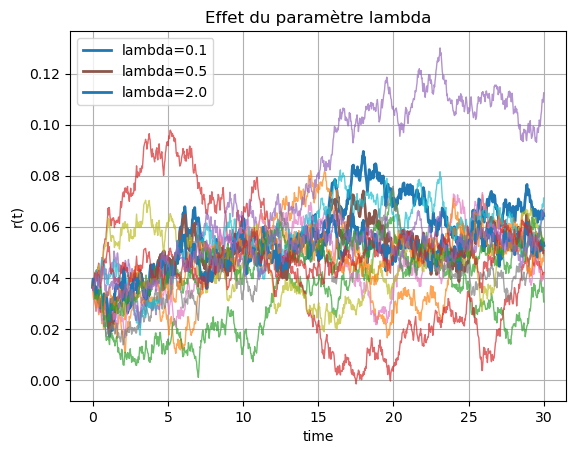

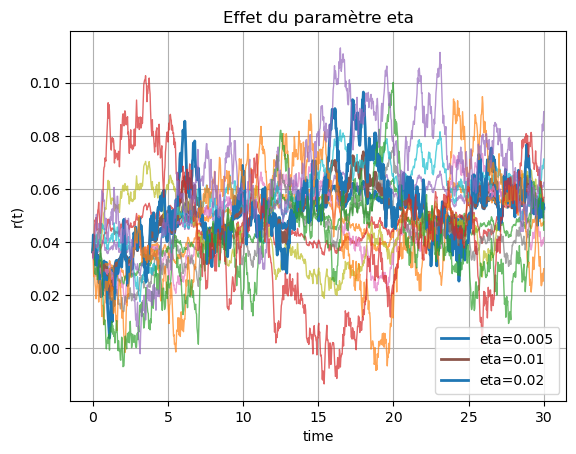

In [27]:
def mainCalculation():
    maturities = np.array([0.08, 1.0, 2.0, 5.0, 10.0, 30.0])
    market_yields = np.array([0.0362, 0.0350, 0.0346, 0.0369, 0.0414, 0.0483])
    yield_interp = interp1d(maturities, market_yields, kind='cubic', fill_value="extrapolate")
    NoOfPaths = 5
    NoOfSteps = 1000
    T = 30.0
    lambd = 0.5
    eta = 0.01
    P0T_market = lambda T: np.exp(-yield_interp(T) * T)      #zero coupon (peut etre rempacé par des données réelles)
#effet de lambda
    plt.figure()
    lambdVec = [0.1, 0.5, 2.0]

    for lambdTemp in lambdVec:
        np.random.seed(1)
        Paths = GeneratePathsHWEuler(NoOfPaths, NoOfSteps, T, P0T_market, lambdTemp, eta)
        plt.plot(Paths["time"], Paths["R"][0], label=f"lambda={lambdTemp}", linewidth=2)
        plt.plot(Paths["time"], Paths["R"][1:].T, alpha=0.7, linewidth=1)

    plt.xlabel("time")
    plt.ylabel("r(t)")
    plt.title("Effet du paramètre lambda")
    plt.legend()
    plt.grid()
    
#effet de eta
    plt.figure()
    etaVec = [0.005, 0.01, 0.02]
    for etaTemp in etaVec:
        np.random.seed(1)
        Paths = GeneratePathsHWEuler(NoOfPaths, NoOfSteps, T, P0T_market, lambd, etaTemp)
        plt.plot(Paths["time"], Paths["R"][0], label=f"eta={etaTemp}", linewidth=2)
        plt.plot(Paths["time"], Paths["R"][1:].T, alpha=0.7, linewidth=1)

    plt.xlabel("time")
    plt.ylabel("r(t)")
    plt.title("Effet du paramètre eta")
    plt.legend()
    plt.grid()

    plt.show()
mainCalculation()